# ThomsonScattering demo
Synthetic-instrument modelling for Thomson scattering is implemented as the `ThomsonScattering` class. All instrument models use an instance of `sims.interface.SolpsInterface` to access the information they need to make predictions of the instrument measurements based on the SOLPS results data:

In [1]:
from sims.interface import SolpsInterface
SI = SolpsInterface('balance.nc')

`ThomsonScattering` also requires information about the instrument function of each channel in the system. Here we use the spatial data for the MAST-U core T.S. system:

In [2]:
from numpy import load
spatial_data = load('mastu_core_ts_spatial_data_45456_445ms.npz')

Plot some of the high-field side instrument function data as an example:

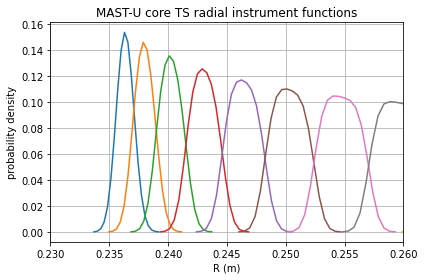

In [3]:
import matplotlib.pyplot as plt
plt.plot(spatial_data['R'].T, spatial_data['weights'].T)
plt.xlim([0.23, 0.26])
plt.title('MAST-U core TS radial instrument functions')
plt.xlabel('R (m)')
plt.ylabel('probability density')
plt.grid()
plt.tight_layout()
plt.show()

Now we have the required data to create an instance of `ThomsonScattering`:

In [4]:
from sims.instruments import ThomsonScattering
TS = ThomsonScattering(
    R=spatial_data['R'],
    z=spatial_data['z'],
    weights=spatial_data['weights'],
    interface=SI
)

The `predict()` method returns predictions of the electron temperature and density in each channel:

In [5]:
ne, te = TS.predict()

By default, `predict()` sets the values of any channels outside the grid to `nan`, so they don't appear when plotted:

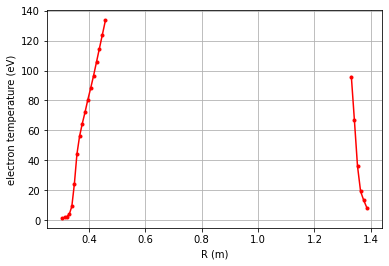

In [6]:
R_centres = (spatial_data['R']*spatial_data['weights']).sum(axis=1)
plt.plot(R_centres, te, '.-', c='red')
plt.xlabel('R (m)')
plt.ylabel('electron temperature (eV)')
plt.grid()
plt.show()

Now lets overplot the electron temperature and density predictions for the high-field side:

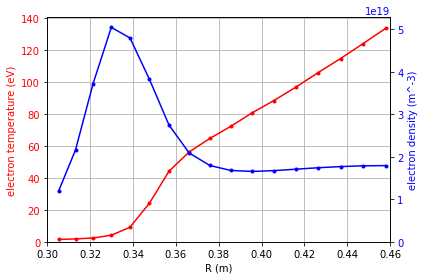

In [7]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('R (m)')
ax1.set_ylabel('electron temperature (eV)', color='red')
ax1.plot(R_centres, te, '.-', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.grid()
ax1.set_ylim([0.,None])
ax1.set_xlim([0.3, 0.46])

ax2 = ax1.twinx()
ax2.plot(R_centres, ne, '.-', color='blue')
ax2.set_ylabel('electron density (m^-3)', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
ax2.set_ylim([0.,None])
fig.tight_layout()
plt.show()